<a href="https://colab.research.google.com/github/jeong-wooseok/R_Practice/blob/master/03_R_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[R 코랩만들기](https://colab.research.google.com/#create=true&language=r)

## 특이값 (Outlier)
* 정상적이라고 생각되는 데이터의 범위 밖에 위치하는 값들을 의미<br>
* 잘못 입력하거나, 정상이지만 상황에 따라 큰 값이 입력되는 경우에 주로 발생<br>
* 전체 데이터의 평균을 끌어올리거나 낮추는 등 왜곡을 가져오기에 분석 전 제거 필요<br>


### 특이값 처리

#### 미국 50개 주에 대한 통계자료
미국 50개 주에 대한 통계자료 중 주별 수입에 대해 상자그래프를 작성하시오

In [11]:
state77 <- data.frame(state.x77) #데이터프레임으로 불러오기

In [12]:
summary(state77)

   Population        Income       Illiteracy       Life.Exp    
 Min.   :  365   Min.   :3098   Min.   :0.500   Min.   :67.96  
 1st Qu.: 1080   1st Qu.:3993   1st Qu.:0.625   1st Qu.:70.12  
 Median : 2838   Median :4519   Median :0.950   Median :70.67  
 Mean   : 4246   Mean   :4436   Mean   :1.170   Mean   :70.88  
 3rd Qu.: 4968   3rd Qu.:4814   3rd Qu.:1.575   3rd Qu.:71.89  
 Max.   :21198   Max.   :6315   Max.   :2.800   Max.   :73.60  
     Murder          HS.Grad          Frost             Area       
 Min.   : 1.400   Min.   :37.80   Min.   :  0.00   Min.   :  1049  
 1st Qu.: 4.350   1st Qu.:48.05   1st Qu.: 66.25   1st Qu.: 36985  
 Median : 6.850   Median :53.25   Median :114.50   Median : 54277  
 Mean   : 7.378   Mean   :53.11   Mean   :104.46   Mean   : 70736  
 3rd Qu.:10.675   3rd Qu.:59.15   3rd Qu.:139.75   3rd Qu.: 81162  
 Max.   :15.100   Max.   :67.30   Max.   :188.00   Max.   :566432  

In [13]:
boxplot.stats(state77$Income) #통계지표 보기

$stats
[1] 3098 3983 4519 4815 5348

$n
[1] 50

$conf
[1] 4333.093 4704.907

$out
[1] 6315

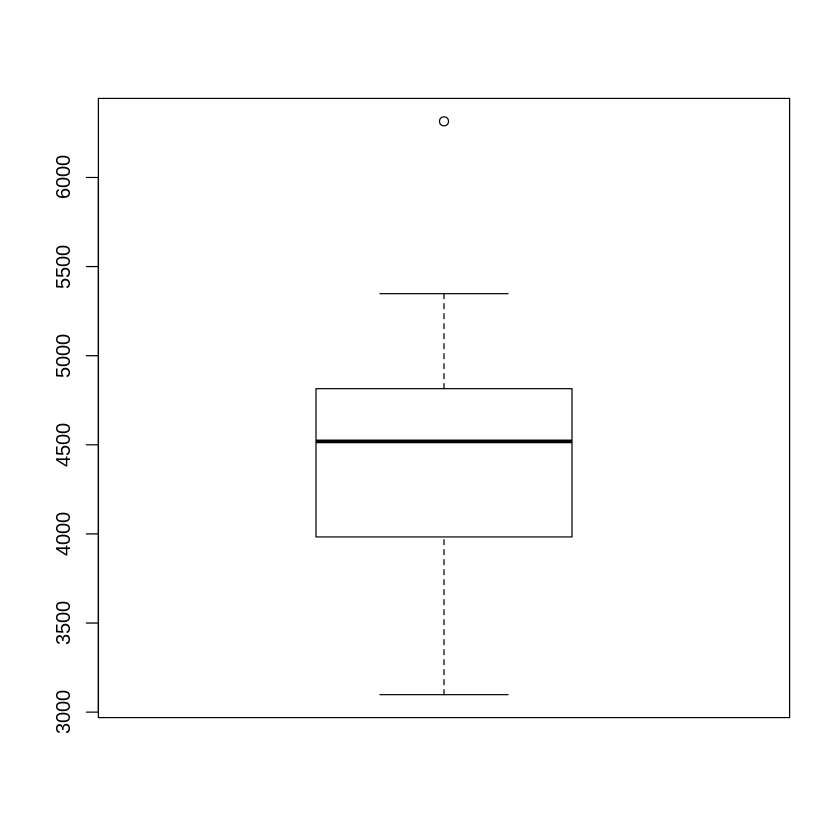

In [14]:
boxplot(state77$Income) #boxplot보기

*50개주 중 6000달러 이상인 특이치가 있음을 알 수 있음*

In [23]:
state77[state77$Income > 6000,]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432


1) 특이값 제거 방식 <br>
특이값을 NA로 바꾼 후 na.omit으로 제거 처리

In [36]:
cnd <- state77$Income > 6000
state77b <- state77
state77b$Income[cnd] <- NA #특이값을 NA로 대체

In [37]:
state77b <- na.omit(state77b) # 특이값 제거

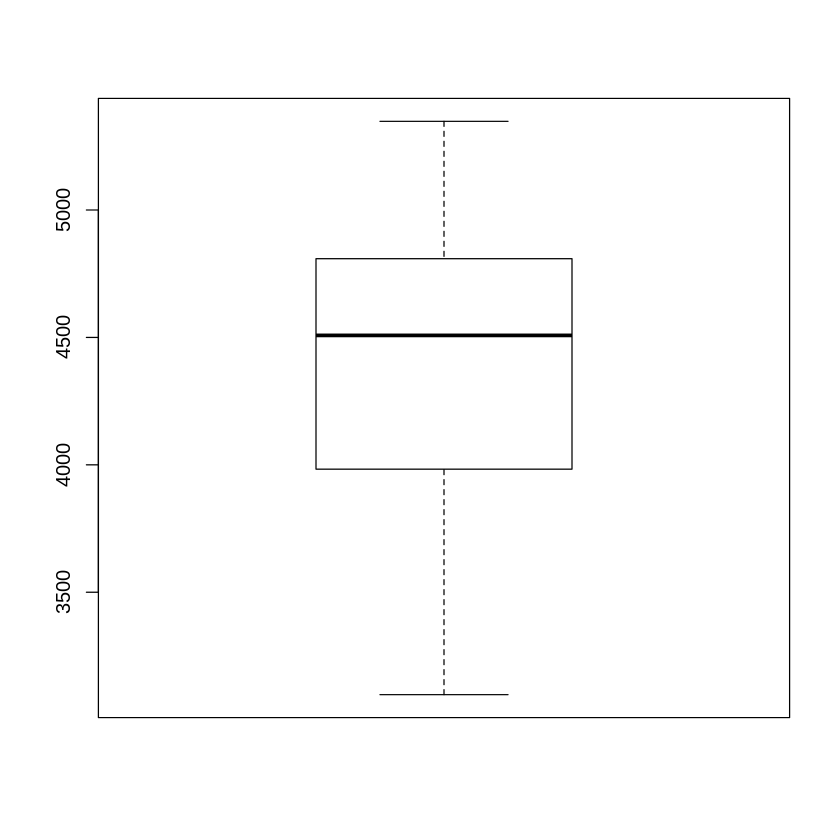

In [38]:
boxplot(state77b$Income) #다시 상자그래프그림

In [39]:
boxplot.stats(state77b$Income)

$stats
[1] 3098 3983 4508 4809 5348

$n
[1] 49

$conf
[1] 4321.56 4694.44

$out
numeric(0)

#### 매니저
나이에 대해 이상치 제거 전/후의 상자그래프를 그려보시오

In [41]:
Manager <- c('1','2','3','4','5')
Date <- c('2014-10-24','2014-10-28','2014-01-10','2014-10-12','2014-05-01')
Country <- c('US','US','UK','UK','UK')
Gender <- c('M','F','F','M','F')
Age <- c(32,45,25,39,99)
q1 = c(5,3,3,3,2)
q2 <- c(4,5,5,3,2)
q3 <- c(5,2,5,4,1)
q4 <- c(5,5,5,NA,2)
q5 <- c(5,5,2,NA,1)

Manager<-data.frame(Manager,Date,Country,Gender,Age,q1,q2,q3,q4,q5)

In [42]:
summary(Manager)

 Manager         Date   Country Gender      Age           q1            q2     
 1:1     2014-01-10:1   UK:3    F:3    Min.   :25   Min.   :2.0   Min.   :2.0  
 2:1     2014-05-01:1   US:2    M:2    1st Qu.:32   1st Qu.:3.0   1st Qu.:3.0  
 3:1     2014-10-12:1                  Median :39   Median :3.0   Median :4.0  
 4:1     2014-10-24:1                  Mean   :48   Mean   :3.2   Mean   :3.8  
 5:1     2014-10-28:1                  3rd Qu.:45   3rd Qu.:3.0   3rd Qu.:5.0  
                                       Max.   :99   Max.   :5.0   Max.   :5.0  
                                                                               
       q3            q4             q5      
 Min.   :1.0   Min.   :2.00   Min.   :1.00  
 1st Qu.:2.0   1st Qu.:4.25   1st Qu.:1.75  
 Median :4.0   Median :5.00   Median :3.50  
 Mean   :3.4   Mean   :4.25   Mean   :3.25  
 3rd Qu.:5.0   3rd Qu.:5.00   3rd Qu.:5.00  
 Max.   :5.0   Max.   :5.00   Max.   :5.00  
               NA's   :1      NA's   :1     

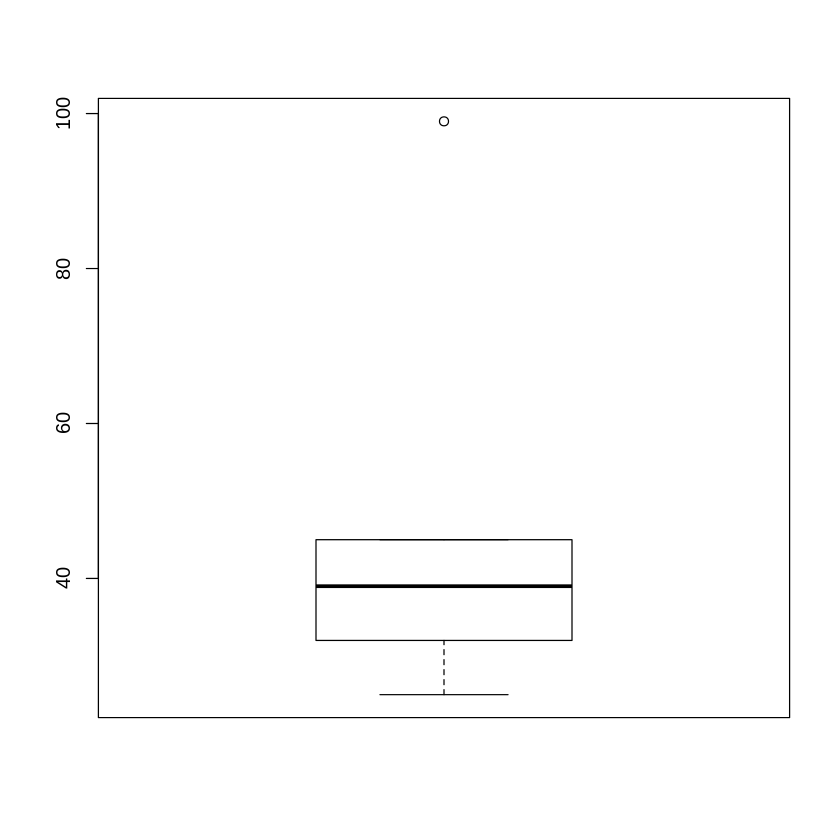

In [44]:
boxplot(Manager$Age)

In [50]:
boxplot.stats(Manager$Age)

$stats
[1] 25 32 39 45 45

$n
[1] 5

$conf
[1] 29.81423 48.18577

$out
[1] 99

In [56]:
outval <- boxplot.stats(Manager$Age)$out
cnd <- Manager$Age == outval
Manager_b <- Manager
Manager_b$Age[cnd] <- NA
Manager_b <- na.omit(Manager_b)

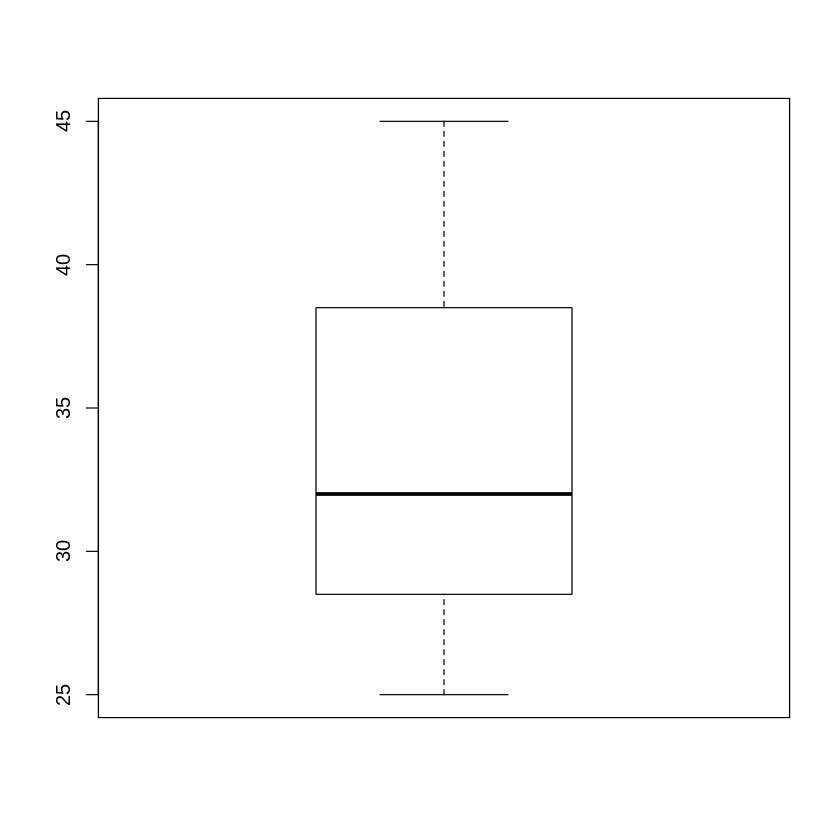

In [57]:
boxplot(Manager_b$Age)

In [49]:
boxplot.stats(Manager_b$Age)

$stats
[1] 25.0 28.5 32.0 38.5 45.0

$n
[1] 3

$conf
[1] 22.87787 41.12213

$out
numeric(0)

In [51]:
iris <- data.frame(iris)

#### Iris

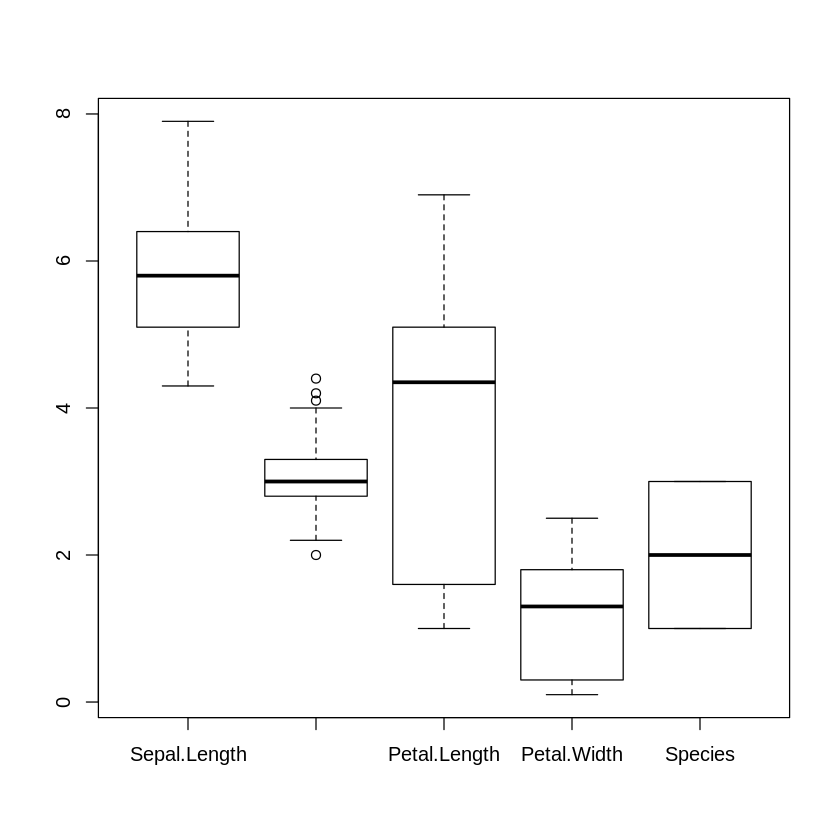

In [52]:
boxplot(iris)

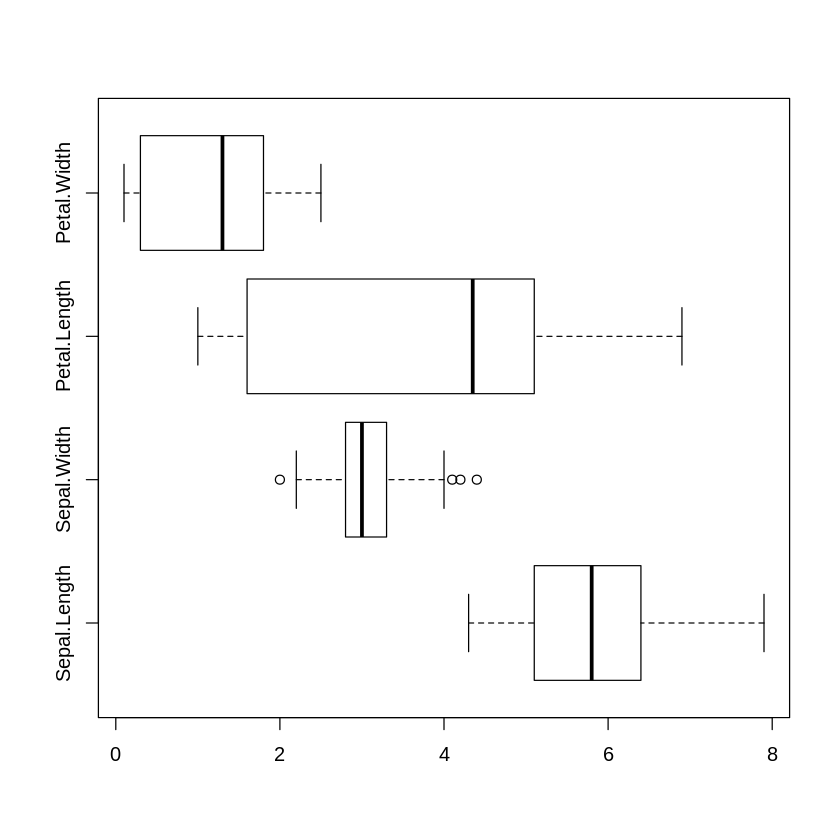

In [58]:
boxplot(iris[,1:4],horizontal = T) # boxplot을 수평으로 출력

#### Titanic <br>
타이타닉 승선객 데이터의 결측치와 이상치 처리하기

In [79]:
titanic <-read.csv('https://raw.githubusercontent.com/jeong-wooseok/R_stastics/master/datasets/titanic.csv'
,na.strings = '') #빈칸은 na로 표시
head(titanic)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S


In [80]:
colSums(is.na(titanic)) # 결측치 확인

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        1        1      264        1        1        1 
    fare    cabin embarked 
       2     1015        3

$stats
[1]  0.1667 21.0000 28.0000 39.0000 66.0000

$n
[1] 1046

$conf
[1] 27.12065 28.87935

$out
[1] 71.0 80.0 76.0 70.0 71.0 67.0 70.0 70.5 74.0

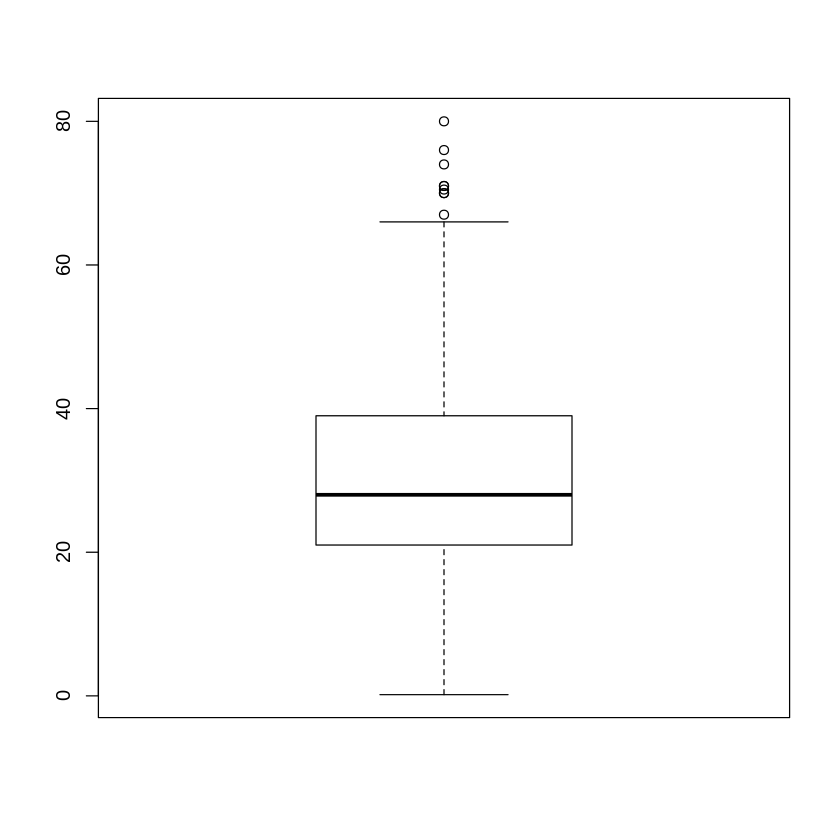

In [81]:
boxplot(titanic$age)
boxplot.stats(titanic$age)

age 결측치는 중앙값으로 대체해도 데이터에 큰 지장이 없을 것으로 판단<br>
다른 데이터는 1~2개의 결측치이므로 제거

In [82]:
# age 중앙값 구해서 결측치에 치환
md <- floor(median(titanic$age,na.rm=T))
titanic$age[is.na(titanic$age)] <-md

In [83]:
# 그 외 결측치 포함하는 모든 행 제거
titanic <- na.omit(titanic)

In [84]:
colSums(is.na(titanic)) # 결측치 확인

pclass survived     name      sex      age    sibsp    parch   ticket 
       0        0        0        0        0        0        0        0 
    fare    cabin embarked 
       0        0        0

In [85]:
# 작업 결과를 파일로 저장
write.csv(titanic,'titanic_practice1.csv',row.names=F)

승선위치(embarked) 별 승선객 수를 시각화 하시오

In [86]:
summary(titanic)

     pclass         survived     
 Min.   :1.000   Min.   :0.0000  
 1st Qu.:1.000   1st Qu.:0.0000  
 Median :1.000   Median :1.0000  
 Mean   :1.188   Mean   :0.6519  
 3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :3.000   Max.   :1.0000  
                                 
                                              name         sex     
 Abelseth, Mr. Olaus Jorgensen                  :  1   female:139  
 Allen, Miss. Elisabeth Walton                  :  1   male  :154  
 Allison, Master. Hudson Trevor                 :  1               
 Allison, Miss. Helen Loraine                   :  1               
 Allison, Mr. Hudson Joshua Creighton           :  1               
 Allison, Mrs. Hudson J C (Bessie Waldo Daniels):  1               
 (Other)                                        :287               
      age              sibsp            parch             ticket   
 Min.   : 0.9167   Min.   :0.0000   Min.   :0.0000   19950   :  6  
 1st Qu.:27.0000   1st Qu.:0.0000   1st Qu.:0.00

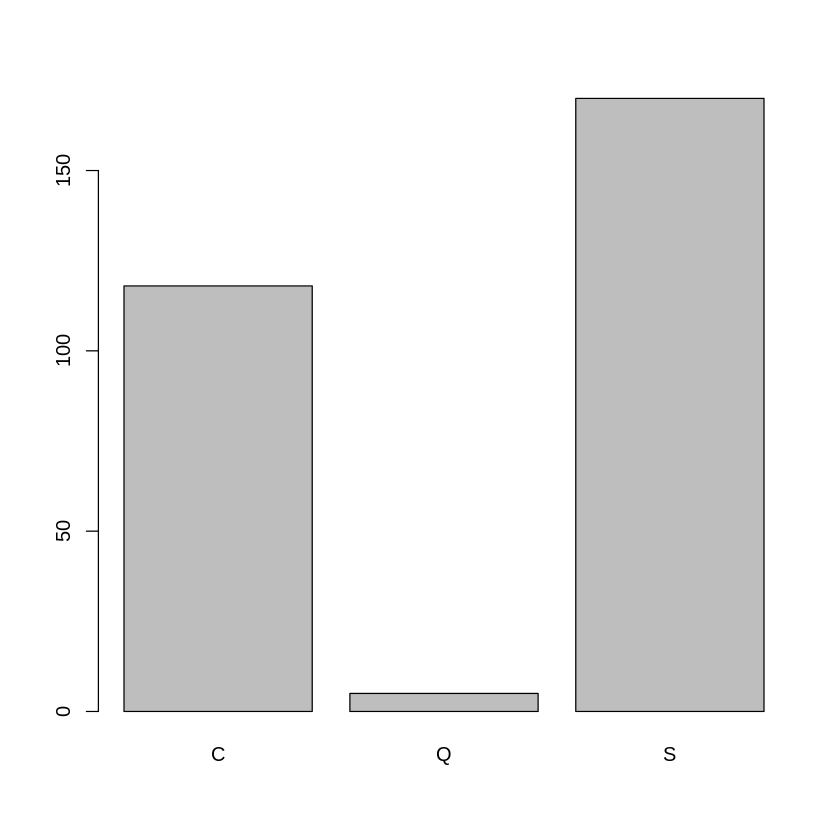

In [87]:
frq_embk <- table(titanic$embarked)
barplot(frq_embk)

승선객 나이에 대한 시각화

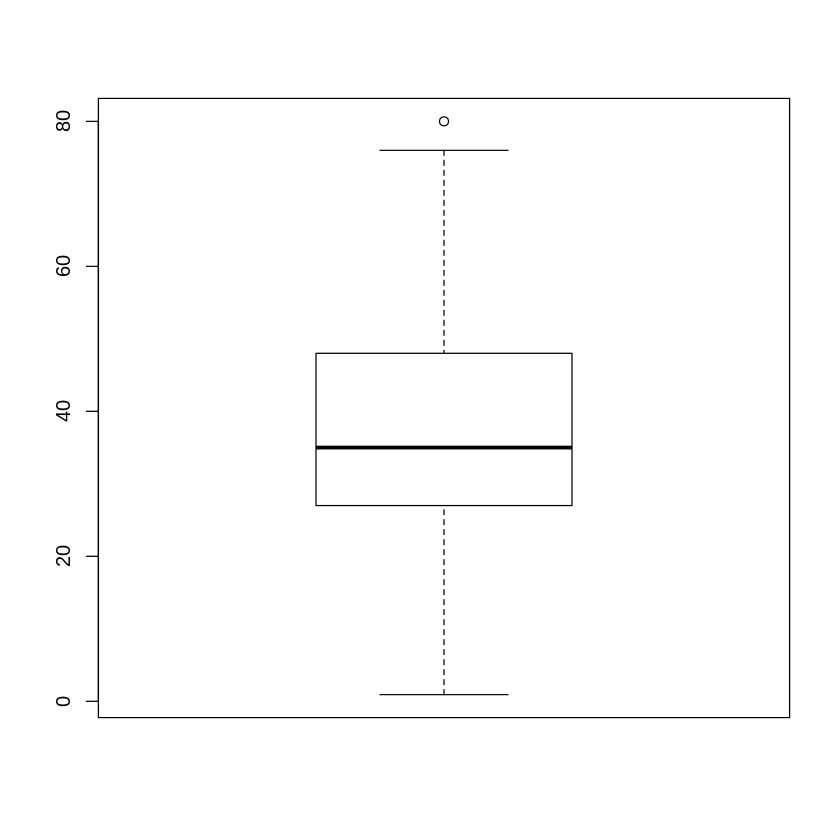

$stats
[1]  0.9167 27.0000 35.0000 48.0000 76.0000

$n
[1] 293

$conf
[1] 33.0616 36.9384

$out
[1] 80

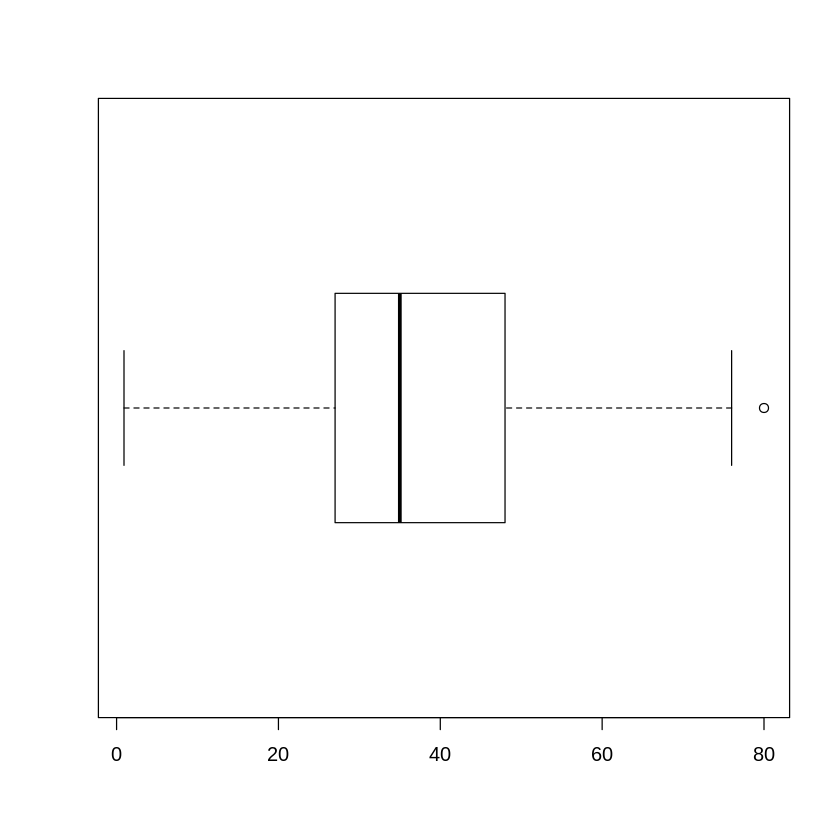

In [93]:
boxplot(titanic$age) #세로
boxplot(titanic$age,horizontal = T) #가로
boxplot.stats(titanic$age)

### 특정컬럼 제거 <br>

하려면 컬럼명에 Null을 대입

In [68]:
# cabin컬럼 제거해보기
titanic_r <-titanic
titanic_r$cabin <-NULL
summary(titanic_r)

     pclass         survived                                name     
 Min.   :1.000   Min.   :0.000   Connolly, Miss. Kate         :   2  
 1st Qu.:2.000   1st Qu.:0.000   Kelly, Mr. James             :   2  
 Median :3.000   Median :0.000                                :   1  
 Mean   :2.295   Mean   :0.382   Abbing, Mr. Anthony          :   1  
 3rd Qu.:3.000   3rd Qu.:1.000   Abbott, Master. Eugene Joseph:   1  
 Max.   :3.000   Max.   :1.000   Abbott, Mr. Rossmore Edward  :   1  
 NA's   :1       NA's   :1       (Other)                      :1302  
     sex           age              sibsp            parch      
       :  1   Min.   : 0.1667   Min.   :0.0000   Min.   :0.000  
 female:466   1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.000  
 male  :843   Median :28.0000   Median :0.0000   Median :0.000  
              Mean   :29.8811   Mean   :0.4989   Mean   :0.385  
              3rd Qu.:39.0000   3rd Qu.:1.0000   3rd Qu.:0.000  
              Max.   :80.0000   Max.   :8.0000   M

## 데이터 전처리 (Data Wrangling)
* 데이터를 조건에 따라 추출하고 원하는 형태로 가공하는 것을 의미
* 각 원소를 추출하는 방법은 boolian indexing을 이용하거나 전처리 전문패키지인 dplr을 이용


### 정렬 (sort/order)
 + 백터 정렬 : sort(백터명)
 + 데이터프레임 정렬 : order(컬럼명)

In [100]:
#sort 내림차순은 decreasing = T
val <- c(11,7,6,8,2,3)
sort(val)
sort(val,decreasing = T) 

[1]  2  3  6  7  8 11

[1] 11  8  7  6  3  2

미국 50개 주를 Income순으로 정렬해보자

In [101]:
#order 내림차순은 마이너스를 붙임
rn <- order(-state77$Income) 
head(state77[rn,],10)

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Connecticut,3100,5348,1.1,72.48,3.1,56.0,139,4862
Maryland,4122,5299,0.9,70.22,8.5,52.3,101,9891
New Jersey,7333,5237,1.1,70.93,5.2,52.5,115,7521
Nevada,590,5149,0.5,69.03,11.5,65.2,188,109889
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Illinois,11197,5107,0.9,70.14,10.3,52.6,127,55748
North Dakota,637,5087,0.8,72.78,1.4,50.3,186,69273
Hawaii,868,4963,1.9,73.60,6.2,61.9,0,6425


In [102]:
# 수입, 인구수, 살인율 순으로 정렬
rn <- order(-state77$Income,
-state77$Population,
-state77$Murder)
head(state77[rn,],10)

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Connecticut,3100,5348,1.1,72.48,3.1,56.0,139,4862
Maryland,4122,5299,0.9,70.22,8.5,52.3,101,9891
New Jersey,7333,5237,1.1,70.93,5.2,52.5,115,7521
Nevada,590,5149,0.5,69.03,11.5,65.2,188,109889
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Illinois,11197,5107,0.9,70.14,10.3,52.6,127,55748
North Dakota,637,5087,0.8,72.78,1.4,50.3,186,69273
Hawaii,868,4963,1.9,73.60,6.2,61.9,0,6425


In [109]:
load('sungjuk.rdata')
sungjuk

name,eng,mat,sci
<fct>,<dbl>,<dbl>,<dbl>
John,90,85,90
Tom,95,96,80
Mark,69,49,70
Jane,78,95,60


In [ ]:
#총점, 평균 컬럼 추가

In [110]:
sungjuk <- within(sungjuk,{
  tot <-eng + mat + sci
  avg <- tot/3
})

In [111]:
#평균을 기준으로 성적 정렬

In [113]:
rn <- order(-sungjuk$avg) 
sungjuk[rn,]

,name,eng,mat,sci,avg,tot
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Tom,95,96,80,90.33333,271
1,John,90,85,90,88.33333,265
4,Jane,78,95,60,77.66667,233
3,Mark,69,49,70,62.66667,188


### 집계하기(aggregate) <br>
* SQL 의 group by 절과 유사
 + aggregate(객체, by = list(기준컬럼), FUN = 집계함수)


In [114]:
#성적데이터에 클래스(반) 변수 추가
sungjuk$class <-c(1,2,1,2)

In [115]:
#클래스 별 최고/최저 영어점수는?
aggregate(sungjuk$eng,
by=list(sungjuk$class),
FUN = max)

Group.1,x
<dbl>,<dbl>
1,90
2,95


In [117]:
#클래스 별 평균 과학점수는?
aggregate(sungjuk$sci,
by=list(sungjuk$class),
FUN = mean)

Group.1,x
<dbl>,<dbl>
1,80
2,70


In [119]:
#클래스 별 평균 영어, 수학, 과학점수는?
aggregate(sungjuk[,c(2:4)],
by=list(sungjuk$class),
FUN = mean)

Group.1,eng,mat,sci
<dbl>,<dbl>,<dbl>,<dbl>
1,79.5,67.0,80
2,86.5,95.5,70


#### mtcars 


73-74년까지 대중적인 32종 차량 주행테스트 데이터

In [122]:
?mtcars
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


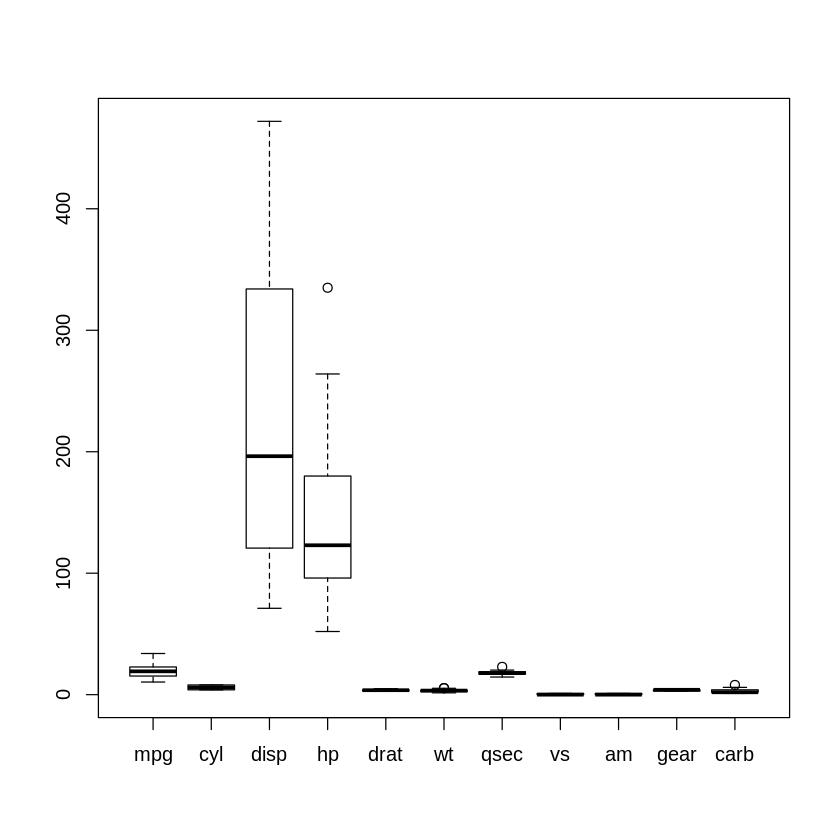

In [129]:
mtcars <-data.frame(mtcars)
boxplot(mtcars)

실린더 컬럼을 기준으로 평균/최대 최소 연비를 구해보자

In [126]:
#평균 구하기
aggregate(mtcars$mpg,
by=list(mtcars$cyl),
FUN = mean)

Group.1,x
<dbl>,<dbl>
4,26.66364
6,19.74286
8,15.10000


In [127]:
#최대값 구하기
aggregate(mtcars$mpg,
by=list(mtcars$cyl),
FUN = max)

Group.1,x
<dbl>,<dbl>
4,33.9
6,21.4
8,19.2


### dplyr <br>
* 데이터프레임을 대상으로 데이터랭글링 작업에 빠른 속도와 많은 유용한 기능을 활용
* 전처리 작업에 사용하는 함수들
 + select : 열선택
 + filter : 조건 검색
 + group_by : 데이터 그룹화
 + mutate : 행/열 추가
 + summarize : 데이터 집계
 + arrange : 데이터 정렬
* 이러한 함수들을 marittr 패키지에 의해 구현된 파이프(>) 패러다임을 이용하여<br>
 체인형식으로 연산을 수행할 수 있음
  + 즉, 먼저 계산한 함수의 결과를 다음 실행할 함수의 입력으로 보낼 수 있음

In [136]:
#install.packages('dplyr')
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [137]:
# 영어점수 출력
sungjuk %>% select(eng)

eng
<dbl>
90
95
69
78


In [138]:
# 영/수/과학 출력
sungjuk %>% select(eng,mat,sci)

eng,mat,sci
<dbl>,<dbl>,<dbl>
90,85,90
95,96,80
69,49,70
78,95,60


In [140]:
# filter : 조건검색
sungjuk %>% filter(class==1)

name,eng,mat,sci,avg,tot,class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
John,90,85,90,88.33333,265,1
Mark,69,49,70,62.66667,188,1


In [142]:
# 영어점수가 70이상이고 수학점수가 80이상인 학생 출력
sungjuk %>% filter(eng>70) %>% filter(mat>80) 

name,eng,mat,sci,avg,tot,class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
John,90,85,90,88.33333,265,1
Tom,95,96,80,90.33333,271,2
Jane,78,95,60,77.66667,233,2
